<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/python_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

data = pd.read_csv('/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv',
index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)

#data.info()
#data['rets'] = np.log(data / data.shift(1))
#data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)
#data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));

In [0]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv',
index_col=0, parse_dates=True)

In [4]:
data.count()

AAPL.O    2138
MSFT.O    2138
INTC.O    2138
AMZN.O    2138
GS.N      2138
SPY       2138
.SPX      2138
.VIX      2138
EUR=      2216
XAU=      2211
GDX       2138
GLD       2138
dtype: int64

In [0]:
appl = pd.DataFrame(data['AMZN.O'])

In [0]:
lags = 3 
cols = []

In [0]:
def datacls(input_data):
    input_data
    input_data['Returns'] = np.log(input_data / input_data.shift())
    input_data.dropna(inplace=True)
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        input_data[col] = np.sign(input_data['Returns'].shift(lag))
        cols.append(col)
    input_data.dropna(inplace=True)

In [0]:
datacls(appl)

In [0]:
from sklearn.model_selection import train_test_split
X,X_test= train_test_split(appl, shuffle=False)

In [10]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X[cols], np.sign(X['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


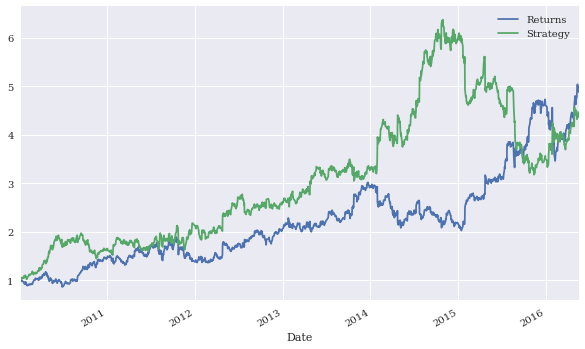

In [11]:
X['Prediction'] = model.predict(X[cols])
X['Strategy'] = X['Prediction'] * X['Returns']
X[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(
figsize=(10, 6));

In [0]:
X = X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


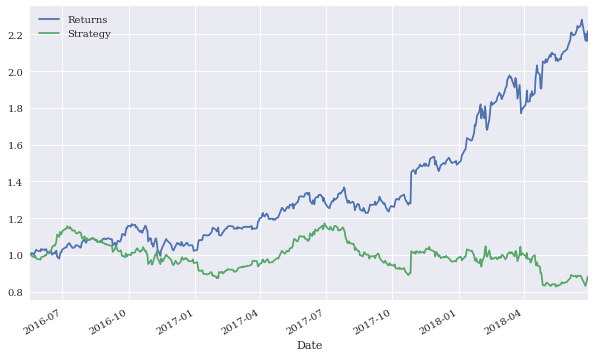

In [13]:
X['Prediction'] = model.predict(X[cols])
X['Strategy'] = X['Prediction'] * X['Returns']
X[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(
figsize=(10, 6));